In [1]:
import numpy as np
import argparse
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from keras.callbacks import ModelCheckpoint

In [2]:
MODEL_SAVE_FILE = 'model/k.h5'

In [3]:

def plot_model_history(model_history):

    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

In [4]:

train_dir = 'data/train'
val_dir = 'data/test'

batch_size = 128
num_epoch = 75

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255)
    # featurewise_center=False,  # set input mean to 0 over the dataset
    # samplewise_center=False,  # set each sample mean to 0
    # featurewise_std_normalization=False,  # divide inputs by std of the dataset
    # samplewise_std_normalization=False,  # divide each input by its std
    # zca_whitening=False,  # apply ZCA whitening
    # rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
    # width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    # height_shift_range=0.2)  # randomly shift images vertically (fraction of total height)
    # horizontal_flip=False,  # randomly flip images
    # vertical_flip=True)  # randomly flip images

train_datagen

In [6]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size= (48,48),
        batch_size= batch_size,
        color_mode= "grayscale",
        class_mode= 'categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size= (48,48),
        batch_size= batch_size,
        color_mode= "grayscale",
        class_mode= 'categorical')

train_generator

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
# Create the model
model = Sequential()

# 1. Conv
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


# 2. Conv Layer
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 3. Conv Layer
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4. Conv Layer
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(6, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

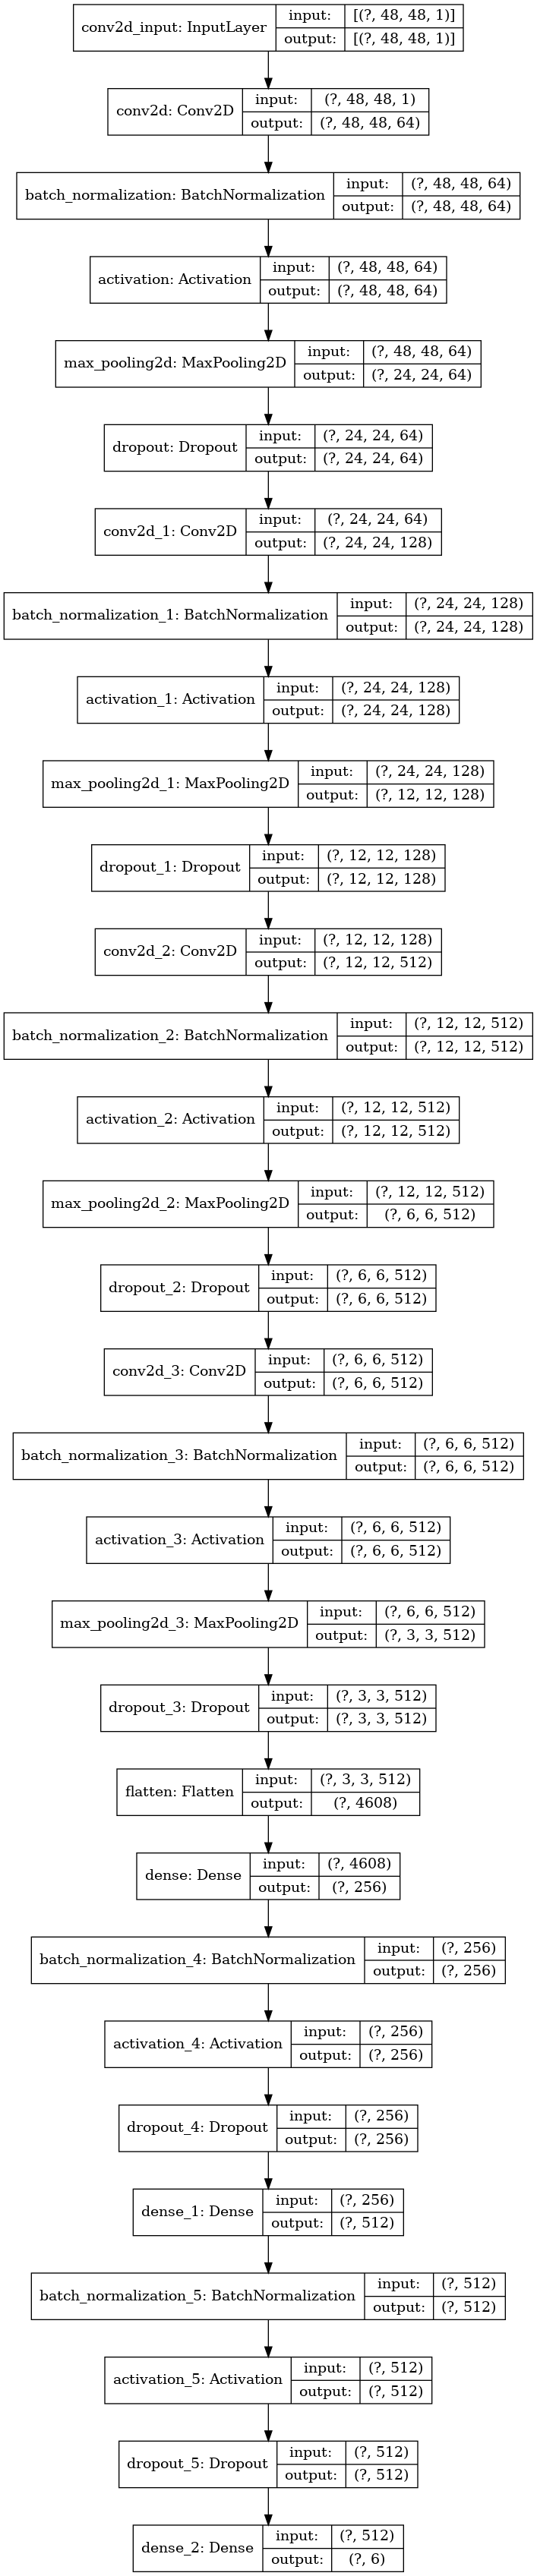

In [6]:
from keras.utils.vis_utils import plot_model


plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [7]:
checkpoint = ModelCheckpoint(MODEL_SAVE_FILE,  # model filename
                             monitor='val_loss', # quantity to monitor
                             verbose=0, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='max') # The decision to overwrite model is made | auto or max |
                                          # automatically depending on the quantity to monitor

## Try using PANDA 

In [8]:
import pandas as pd
import seaborn as sns

In [9]:
df = pd.read_csv("fer2013.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [10]:
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


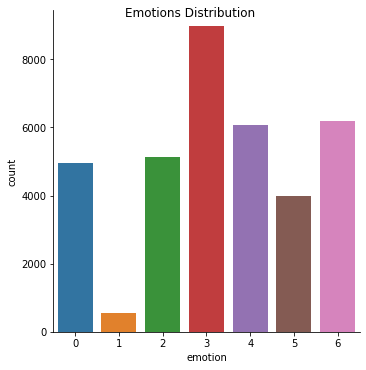

In [11]:
ax = sns.catplot(x="emotion", kind="count", data=df)
ax.fig.suptitle("Emotions Distribution")
ax

In [12]:
# Emotion 1 not enough data

emotion_1 = df[df.emotion == 1]
print(len(emotion_1))
len(df)

547


35887

In [13]:
tmp_emotion_1 = emotion_1.head(6)
img_emotion_1 = tmp_emotion_1
img_emotion_1

,emotion,pixels,Usage
299,1,126 126 129 120 110 168 174 172 173 174 170 15...,Training
388,1,89 55 24 40 43 48 53 55 59 41 33 31 22 32 42 4...,Training
416,1,204 195 181 131 50 50 57 56 66 98 138 161 173 ...,Training
473,1,14 11 13 12 41 95 113 112 111 122 132 137 142 ...,Training
533,1,18 25 49 75 89 97 100 100 101 103 105 107 107 ...,Training
573,1,49 53 44 48 45 41 28 28 36 38 39 64 78 86 74 6...,Training


In [14]:
def pixels_to_numpy(row):
    
    val = list(row["pixels"].split(' '))
    val = np.asarray(val, dtype=np.uint8)
    val = val.reshape((48, 48))
    return val

img_emotion_1["numpy"] = img_emotion_1.apply(pixels_to_numpy, axis=1)
img_emotion_1["numpy"]

299    [[126, 126, 129, 120, 110, 168, 174, 172, 173,...
388    [[89, 55, 24, 40, 43, 48, 53, 55, 59, 41, 33, ...
416    [[204, 195, 181, 131, 50, 50, 57, 56, 66, 98, ...
473    [[14, 11, 13, 12, 41, 95, 113, 112, 111, 122, ...
533    [[18, 25, 49, 75, 89, 97, 100, 100, 101, 103, ...
573    [[49, 53, 44, 48, 45, 41, 28, 28, 36, 38, 39, ...
Name: numpy, dtype: object

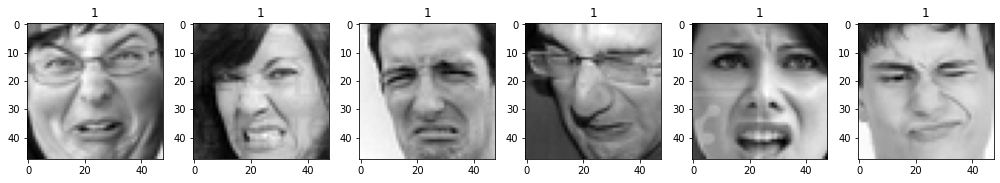

In [15]:
from PIL import Image
plt.figure(0, figsize=(14, 20))
count_1 = 1

for i, row in img_emotion_1.iterrows():
    # print(row)
    # print(type(row))
    # print(type(row.numpy))
    plt.subplot(7, 6, count_1, title=row["emotion"])
    img = Image.fromarray(row.numpy)
    plt.imshow(img, cmap='gray')
    count_1 += 1

plt.tight_layout()
plt.show()


## Droping emotion 1 => not very important + lack of data

In [16]:
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [17]:
df = df[df.emotion != 1]
len(df)

35340

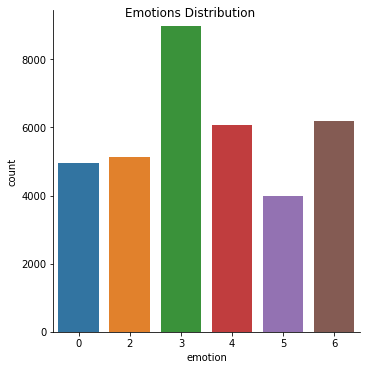

In [18]:
ax = sns.catplot(x="emotion", kind="count", data=df)
ax.fig.suptitle("Emotions Distribution")
ax

In [19]:
df['numpy'] = df.apply(pixels_to_numpy, axis=1)
df

,emotion,pixels,Usage,numpy
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,"[[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, ..."
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,"[[151, 150, 147, 155, 148, 133, 111, 140, 170,..."
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,"[[231, 212, 156, 164, 174, 138, 161, 173, 182,..."
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,"[[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, ..."
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,"[[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 2..."
...,...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest,"[[50, 36, 17, 22, 23, 29, 33, 39, 34, 37, 37, ..."
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest,"[[178, 174, 172, 173, 181, 188, 191, 194, 196,..."
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest,"[[17, 17, 16, 23, 28, 22, 19, 17, 25, 26, 20, ..."
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest,"[[30, 28, 28, 29, 31, 30, 42, 68, 79, 81, 77, ..."


In [20]:
train_dataset = df[df.Usage == 'Training']
train_dataset

,emotion,pixels,Usage,numpy
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,"[[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, ..."
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,"[[151, 150, 147, 155, 148, 133, 111, 140, 170,..."
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,"[[231, 212, 156, 164, 174, 138, 161, 173, 182,..."
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,"[[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, ..."
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,"[[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 2..."
...,...,...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...,Training,"[[84, 85, 85, 85, 85, 85, 85, 85, 86, 86, 86, ..."
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...,Training,"[[114, 112, 113, 113, 111, 111, 112, 113, 115,..."
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...,Training,"[[74, 81, 87, 89, 95, 100, 98, 93, 105, 120, 1..."
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...,Training,"[[222, 227, 203, 90, 86, 90, 84, 77, 94, 87, 9..."


In [21]:
test_dataset = df[df.Usage != 'Training']
test_dataset

,emotion,pixels,Usage,numpy
28709,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...,PublicTest,"[[254, 254, 254, 254, 254, 249, 255, 160, 2, 5..."
28711,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...,PublicTest,"[[69, 118, 61, 60, 96, 121, 103, 87, 103, 88, ..."
28712,6,205 203 236 157 83 158 120 116 94 86 155 180 2...,PublicTest,"[[205, 203, 236, 157, 83, 158, 120, 116, 94, 8..."
28713,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...,PublicTest,"[[87, 79, 74, 66, 74, 96, 77, 80, 80, 84, 83, ..."
28714,3,235 233 223 109 34 37 34 31 28 38 56 69 106 13...,PublicTest,"[[235, 233, 223, 109, 34, 37, 34, 31, 28, 38, ..."
...,...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest,"[[50, 36, 17, 22, 23, 29, 33, 39, 34, 37, 37, ..."
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest,"[[178, 174, 172, 173, 181, 188, 191, 194, 196,..."
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest,"[[17, 17, 16, 23, 28, 22, 19, 17, 25, 26, 20, ..."
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest,"[[30, 28, 28, 29, 31, 30, 42, 68, 79, 81, 77, ..."


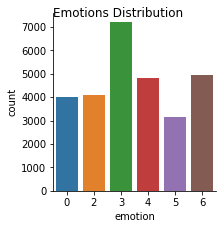

In [22]:
ax = sns.catplot(x="emotion", kind="count", data=train_dataset, height=3)
ax.fig.suptitle("Emotions Distribution")
ax

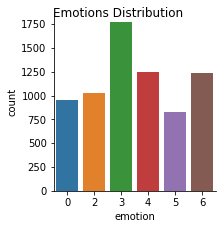

In [23]:
ax = sns.catplot(x="emotion", kind="count", data=test_dataset, height=3)
ax.fig.suptitle("Emotions Distribution")
ax

## Recreating datagen

In [76]:
# outer_names = ['test','train']
# inner_names = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']
# os.makedirs('data', exist_ok=True)
# for outer_name in outer_names:
#     os.makedirs(os.path.join('data', outer_name), exist_ok=True)
#     for inner_name in inner_names:
#         os.makedirs(os.path.join('data', outer_name, inner_name), exist_ok=True)

In [24]:
def prepare_data(data, path):
    outer_names = ['test','train']
    inner_names = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']
    os.makedirs('data', exist_ok=True)
    for outer_name in outer_names:
        os.makedirs(os.path.join('data', outer_name), exist_ok=True)
        for inner_name in inner_names:
            os.makedirs(os.path.join('data', outer_name, inner_name), exist_ok=True)
    from tqdm import tqdm
    angry = 0
    disgusted = 0
    fearful = 0
    happy = 0
    sad = 0
    surprised = 0
    neutral = 0
    pbar = tqdm(total = len(data))
    for index, row in data.iterrows():
        img = Image.fromarray(row['numpy'])
        # img.show()
        if row['emotion'] == 0:
            img.save('data/' + path + '/angry/im' + str(angry) + '.png')
            angry += 1
        elif row['emotion'] == 1:
            img.save('data/' + path + '/disgusted/im' + str(disgusted) + '.png')
            disgusted += 1
        elif row['emotion'] == 2:
            img.save('data/' + path + '/fearful/im' + str(fearful) + '.png')
            fearful += 1
        elif row['emotion'] == 3:
            img.save('data/' + path + '/happy/im' + str(happy) + '.png')
            happy += 1
        elif row['emotion'] == 4:
            img.save('data/' + path + '/sad/im' + str(sad) + '.png')
            sad += 1
        elif row['emotion'] == 5:
            img.save('data/' + path + '/surprised/im' + str(surprised) + '.png')
            surprised += 1
        elif row['emotion'] == 6:
            img.save('data/' + path + '/neutral/im' + str(neutral) + '.png')
            neutral += 1
        pbar.update(1)

    pbar.close()
    print("Done!")

In [78]:
# prepare_data(train_dataset, 'train')


100%|██████████| 28273/28273 [00:09<00:00, 3091.39it/s]Done!



In [79]:
# prepare_data(test_dataset, 'test')


100%|██████████| 7067/7067 [00:02<00:00, 2493.86it/s]Done!



train_dataset

In [28]:
img_size = 48

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size= (img_size, img_size),
        batch_size= batch_size,
        color_mode= "grayscale",
        class_mode= 'categorical',
        shuffle=True)

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size= (img_size, img_size),
        batch_size= batch_size,
        color_mode= "grayscale",
        class_mode= 'categorical',
        shuffle=True)

train_generator

Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


In [29]:
# LEARN_RATE = 1.0e-4

def train(num_epoch = 50, load=False):
    if load and os.path.exists(MODEL_SAVE_FILE): 
        print('Loading simple model Weights')
        model.load_weights(MODEL_SAVE_FILE)

        
    checkpoint = ModelCheckpoint(MODEL_SAVE_FILE,  # model filename
                            monitor = 'val_loss', # quantity to monitor
                            verbose = 1, # verbosity - 0 or 1
                            save_best_only= True, # The latest best model will not be overwritten
                            mode='max') # Te decision to overwrite model is made | auto or max |

    from keras.callbacks import EarlyStopping,ReduceLROnPlateau, Callback

    # early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.00001, patience=11, verbose=1, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1) # patience | 1 or 10
    callbacks = [checkpoint, reduce_lr]

    

    model.compile(loss ='categorical_crossentropy',
                optimizer='adam',
                  metrics=['accuracy'])

    steps_per_epoch = train_generator.n // train_generator.batch_size
    validation_steps = validation_generator.n // validation_generator.batch_size


    model_info = model.fit(
            train_generator,
            # batch_size = 128,
            steps_per_epoch = steps_per_epoch,
            epochs = num_epoch,
            validation_data = validation_generator,
            validation_steps= validation_steps,
            # verbose = 1,
            # shuffle=True,
            callbacks=[checkpoint])
    plot_model_history(model_info)
    model.save_weights('k.h5')

In [27]:
train()

NameError: name 'train_generator' is not defined